# Procesando archivos y bases de datos con Python 

Taller "Introducción a la Programación en Python".

[G.F. Rubilar](http://google.com/+GuillermoRubilar), Stefan Vogt y Esteban Vöhringer-Martinez

La última versión de este [jupyter notebook](http://ipython.org/notebook.html) está disponible en (https://github.com/PythonUdeC/CPC19/blob/master/05-Procesamiento_datos.ipynb).

## Este módulo entregará las herramientas para:

1. Lectura y escritura de archivos con funciones propias de python
2. Lectura y escritura de archivos con funciones de numpy: loadtxt, getfromtxt etc
3. Introducción al uso de base de datos con Pandas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 1. Procesamiento de archivos con la función open y close de python

Vamos a trabajar con el archivo *posicion_velocidad.dat* que contiene la velocidad en km/h de un auto medida en distintos puntos de su  trayectoria expresada en km. Este archivo se encuentra en el repositorio en el directorio _Data/Clases_

```
0.0  30
0.8  50
1.5  43.2
2.0  20.0
2.6  42.1
```

Primero abrimos un objeto con la ubicación (ruta) en donde se encuentra el archivo.

In [2]:
str_archivo = 'Data/Clases/posicion_velocidad.dat'
f = open(str_archivo)

Obtener información sobre el objeto que apunta al archivo

In [3]:
f.name

'Data/Clases/posicion_velocidad.dat'

In [4]:
f.mode

'r'

Por defecto los archivos se abren en modo de lectura solamente(read). Otros modos son w (write=escritura), a (append=agregar)

### Usamos el método _read_ del objeto f para leer el contenido.

In [5]:
data = f.read()

In [6]:
data

'0.0  30\n0.8  50\n1.5  43.2\n2.0  20.0\n2.6  42.1\n'

Si queremos volver a leer el contenido

In [7]:
data = f.read()

In [8]:
data

''

**Problema:** El archivo se procesa una vez y después se llego al final del archivo.
Cerramos el objeto y volvemos a abrirlo para partir de nuevo.

In [9]:
f.close()

In [10]:
f = open(str_archivo)

### Ahora usamos método readline para leer el archivo

In [11]:
f.readline?

In [12]:
line = f.readline()

In [13]:
line

'0.0  30\n'

In [14]:
line.split()

['0.0', '30']

In [15]:
x = line.split()[0]
x

'0.0'

In [16]:
line.split()[0], line.split()[1]

('0.0', '30')

Volvemos a ejecutar readline para leer próxima linea.

In [17]:
line = f.readline()

In [18]:
line

'0.8  50\n'

In [19]:
f.close()

**También podemos leer todas las líneas de una vez en una lista de strings con la función _readlines_**

A diferencia de _read_ esto crea una lista de strings y no un string entero.

In [20]:
f = open(str_archivo)

In [21]:
lines = f.readlines()

In [22]:
lines

['0.0  30\n', '0.8  50\n', '1.5  43.2\n', '2.0  20.0\n', '2.6  42.1\n']

In [23]:
lines[0]

'0.0  30\n'

In [24]:
lines[0].split()

['0.0', '30']

In [25]:
f.close()

**Ahora vamos a leer el contenido en dos variables que muestran la posición (x) y la velocidad (v).**

In [26]:
f = open(str_archivo)

Cuando usamos un bucle sobre el objeto f se ejecuta la función _readline_ en cada vuelta del bucle.

In [27]:
for line in f:
    x = line.split()[0]
    v = line.split()[1]

In [28]:
x

'2.6'

De esta forma se leen linea por linea.
**Pero la variable se sobreescribe.**
Por eso debemos trabajar con una lista

In [29]:
f.close()
f = open(str_archivo)

In [30]:
x = []
v = []

In [31]:
for line in f:
    x.append(line.split()[0])
    v.append(line.split()[1])

In [32]:
x

['0.0', '0.8', '1.5', '2.0', '2.6']

In [33]:
type(x[0])

str

In [34]:
v

['30', '50', '43.2', '20.0', '42.1']

In [35]:
type(v[0])

str

** Realizamos un gráfico de la velocidad contra la posición de la trayectoria en el cual se midio**

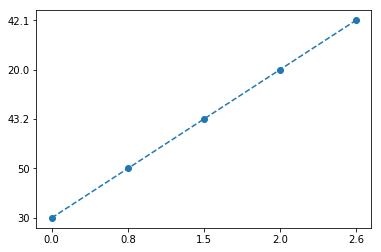

In [36]:
plt.plot(x,v,'o--')

** Supongamos que se nos solicita graficar velocidad pero en función de la posición en metros.**

In [37]:
x_m = []
for i in range(len(x)):
    x_m.append(x[i]*1000)

In [38]:
x_m

['0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.

Debemos transformar la información leida al tipo de variable **float** para poder utilizar cualquier tratamiento númerico de los datos.

In [39]:
f.close()
f = open(str_archivo)
x = []
v = []
for line in f:
    x.append(float(line.split()[0]))
    v.append(float(line.split()[1]))

In [40]:
type(x[0])

float

In [41]:
x_m = []
for i in range(len(x)):
    x_m.append(x[i]*1000)

In [42]:
x_m

[0.0, 800.0, 1500.0, 2000.0, 2600.0]

Ahora cambiamos las velocidades a m/s

In [43]:
v_ms = []
for i in range(len(v)):
    v_ms.append(v[i] * 1000 / 3600)

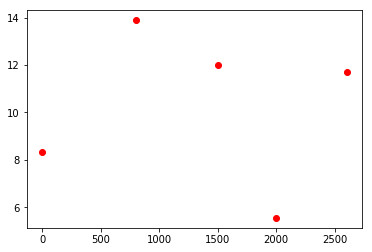

In [44]:
plt.plot(x_m,v_ms,'o',color='red')

### Cómo guardar los valores en metros y metros por segundo a un archivo diferente.

In [45]:
str_archivo_out = 'Data/Clases/posicion_velocidad_metros.dat'
f_out = open(str_archivo_out,'w')

In [46]:
f_out.write(str(x_m))

36

In [47]:
f_out.close()

Al observar el archivo vemos que se escribe todo junto.

Cómo escribimos cada item por separado?

In [48]:
f_out = open(str_archivo_out,'w')

In [49]:
for i in range(len(x_m)):
    f_out.write(str(x_m[i]))

In [50]:
f_out.close()

Como escribir en forma de columna?

In [51]:
f_out = open(str_archivo_out,'w')

In [52]:
for i in range(len(x_m)):
    f_out.write(str(x_m[i])+'\n')

In [53]:
f_out.close()

Ahora escribimos la posición junto a la velocidad en el archivo

In [54]:
f_out = open(str_archivo_out,'w')

In [55]:
for i in range(len(x_m)):
    f_out.write(str(x_m[i]) + '\t' + str(v_ms[i]) + '\n')

In [56]:
f_out.close()

Mejoremos el formato de los datos escritos.

Para mayor información ver  https://docs.python.org/3/library/string.html#formatstrings y https://docs.python.org/3/tutorial/inputoutput.html

In [57]:
f_out = open(str_archivo_out,'w')

In [58]:
for i in range(len(x_m)):
    f_out.write("{0:.2f}\t{1:.2f}\n".format(x_m[i], v_ms[i]))

In [59]:
f_out.close()

**En python 2.7:**

for i in range(len(x_m)):

    f_out.write("%.2f\t%.2f\n" % (x_m[i], v_ms[i]))

Format Strings for python 2.7

%d : integer

%5d : %-5d : integer in a field of width 5 chars integer in a field of width 5 chars, but adjusted to the left

%05d :integer in a field of width 5 chars, padded with zeroes from the left

%g :  float variable in %f or %g notation

%e : float variable in scientific notation

%11.3e : float variable in scientific notation, with 3 decimals, field of width 11 chars 

%5.1f : float variable in fixed decimal notation, with one decimal, field of width 5 chars 

%.3f : float variable in fixed decimal form, with three decimals, field of min. width
%s : string

**Format strings en python 3.6 **

In [60]:
str.format?

In [61]:
f_out = open(str_archivo_out,'w')

La versión mas moderna es usar la función format de un string para dar formato a los datos.

In [62]:
for i in range(len(x_m)):
    f_out.write('{0:.2f}   {1:.2f}\n'.format(x_m[i],v_ms[i]))

In [63]:
f.close()

Alineamos los datos

In [64]:
f_out.close()
f_out = open(str_archivo_out,'w')

In [65]:
for i in range(len(x_m)):
    f_out.write('{0:<8.2f}   {1:<4.2f}\n'.format(x_m[i],v_ms[i]))

In [66]:
f_out.close()

## Agregar datos a un archivo existente

In [67]:
f_out = open(str_archivo_out,'a')

In [68]:
f_out.mode

'a'

Go to end of file

In [69]:
f_out.write('END\n')

4

In [70]:
f_out.close()

_Abra el archivo para verificar si se añado END al final_

# 2. Procesar archivos con las funciones de numpy 

Cuando el archivo contiene comentarios que identifican con un caracter específico como **# @** se pueden usar las funciones _loadtxt_ o _genfromtxt_ de numpy para poder procesarlo. Si el contenido es muy heterogeneo se puede procesar el archivo a través de tratamientos de distintos casos con _if_

In [71]:
str_archivo = 'Data/Clases/posicion_velocidad_coment.dat'
f = open(str_archivo)

In [72]:
x = []
v = []
for line in f:
    x.append(float(line.split()[0]))
    v.append(float(line.split()[1]))        

ValueError: could not convert string to float: '#posicion'

In [73]:
f.close()
f = open(str_archivo)

In [74]:
x = []
v = []
for line in f:
    if line[0] is not "#":
        x.append(float(line.split()[0]))
        v.append(float(line.split()[1]))        
        

In [75]:
x

[0.0, 0.8, 1.5, 2.0, 2.6]

In [76]:
f.close()

** El texto se puede procesar con distintas opciones de if hasta poder guardar los datos en distintos objetos.**

## Ahora usaremos la funciones de numpy para procesar archivos.

Trabajaremos con el archivo posicion_velocidad_coment.dat que se muestra aquí:


```#posicion velocidad
0.0  30
0.8  50
1.5  43.2
2.0  20.0
2.6  42.1```

In [77]:
str_archivo = 'Data/Clases/posicion_velocidad_coment.dat'

### Función _loadtxt_

Usamos la función loadtxt de numpy que nos permite procesar archivos con datos númericos

In [78]:
np.loadtxt?

Existen las opciones de definir el tipo de información a procesar como float, string, double etc, el delimitador de los valores y el saltar los primeras n lineas con skiprows.

In [79]:
np.loadtxt(str_archivo)

array([[  0. ,  30. ],
       [  0.8,  50. ],
       [  1.5,  43.2],
       [  2. ,  20. ],
       [  2.6,  42.1]])

In [80]:
data = np.loadtxt(str_archivo)

In [81]:
data[:,0]

array([ 0. ,  0.8,  1.5,  2. ,  2.6])

In [82]:
data[:,1]

array([ 30. ,  50. ,  43.2,  20. ,  42.1])

In [83]:
x = data[:,0]

In [84]:
v = data[:,1]

In [85]:
x, v

(array([ 0. ,  0.8,  1.5,  2. ,  2.6]),
 array([ 30. ,  50. ,  43.2,  20. ,  42.1]))

Ahora importamos directamente en las dos variables con opción "unpack"

In [86]:
x,v  = np.loadtxt(str_archivo,unpack=True)

In [87]:
x

array([ 0. ,  0.8,  1.5,  2. ,  2.6])

### Función genfromtxt

Usamos la alternativa de genfromtxt para trabajar con archivos que presenten datos incompletos o para tener mayor flexibilidad en el procesamiento.


In [88]:
np.genfromtxt?

El archivo posicion_velocidad_missing.dat le falta un valor en la velocidad:

```@ Archivo obtenido el 30 diciembre 2016
0.0  30
0.8  50
1.5  43.2
2.0  Bla 
2.6  42.1```

**Probamos con una función alternativa de numpy _loadtxt_**

In [89]:
str_archivo = 'Data/Clases/posicion_velocidad_missing.dat'
data = np.loadtxt(str_archivo,comments='@')

ValueError: could not convert string to float: b'Bla'

_ No podemos usar esta función si los datos son incompletos_

** Ahora con genfromtxt **

In [90]:
str_archivo = 'Data/Clases/posicion_velocidad_missing.dat'
data = np.genfromtxt(str_archivo,comments='@')

In [91]:
data

array([[  0. ,  30. ],
       [  0.8,  50. ],
       [  1.5,  43.2],
       [  2. ,   nan],
       [  2.6,  42.1]])

Como cambiamos el valor del item ausente?

In [92]:
np.genfromtxt?

In [93]:
data = np.genfromtxt(str_archivo,comments='@',filling_values='0.0')

In [94]:
data

array([[  0. ,  30. ],
       [  0.8,  50. ],
       [  1.5,  43.2],
       [  2. ,   0. ],
       [  2.6,  42.1]])

** Leer el nombre de la variable que representará los datos desde el archivo** 

Como ejemplo se usará el archivo posicion_velocidad_names.dat:

```@ Archivo obtenido el 30 diciembre 2016
x    v
0.0  30
0.8  50
1.5  43.2
2.0  Bla 
2.6  42.1```

In [95]:
str_archivo = 'Data/Clases/posicion_velocidad_names.dat'
data1 = np.genfromtxt(str_archivo,skip_header=1,names=True,filling_values='0.0')

_No se puede usar la opción de "comments" y "names" juntos_

In [96]:
str_archivo = 'Data/Clases/posicion_velocidad_names.dat'
data1 = np.genfromtxt(str_archivo,comments='@',names=True,filling_values='0.0')

ValueError: Some errors were detected !
    Line #2 (got 2 columns instead of 6)
    Line #3 (got 2 columns instead of 6)
    Line #4 (got 2 columns instead of 6)
    Line #5 (got 2 columns instead of 6)
    Line #6 (got 2 columns instead of 6)
    Line #7 (got 2 columns instead of 6)

In [97]:
data1

array([( 0. ,  30. ), ( 0.8,  50. ), ( 1.5,  43.2), ( 2. ,   0. ),
       ( 2.6,  42.1)],
      dtype=[('x', '<f8'), ('v', '<f8')])

In [98]:
type(data1)

numpy.ndarray

In [99]:
data1['v']

array([ 30. ,  50. ,  43.2,   0. ,  42.1])

In [100]:
data1['x']

array([ 0. ,  0.8,  1.5,  2. ,  2.6])

In [101]:
np.genfromtxt?

In [102]:
np.savetxt?

## Después de hacer un análisis numérico con numpy como guardar array de datos en archivo

### Usando las opciones "tofile" y "fromfile" en numpy

In [103]:
x = np.array([[0, 1, 2 ],[2, 3, 4]])

In [104]:
f = open('Data/Clases/array.bin','w')
x.tofile(f,format="%d")

In [105]:
x.tofile?

In [106]:
x


array([[0, 1, 2],
       [2, 3, 4]])

In [107]:
f.close()

In [108]:
y = np.fromfile('Data/Clases/array.bin')

In [109]:
y

array([  0.00000000e+000,   4.94065646e-324,   9.88131292e-324,
         9.88131292e-324,   1.48219694e-323,   1.97626258e-323])

**Los datos se guardan en forma binaria sin información alguna sobre el tipo de variable. Aparte la forma de guardar los datos depende del sistema operativo que se usa. Por eso se recomienda usar la opción save y load de numpy.**

In [110]:
x

array([[0, 1, 2],
       [2, 3, 4]])

_Se recomienda usar la opción np.save del módulo numpy_

In [111]:
np.save?

In [112]:
f = 'Data/Clases/array.npy'
np.save(f,x)

In [113]:
y = np.load(f)

In [114]:
y

array([[0, 1, 2],
       [2, 3, 4]])

*También se puede guardar en forma de texto sacrificando precisión y espacio de disco. Se puede especificar el formato de la variable a guardar*

In [115]:
np.savetxt?

In [116]:
np.savetxt('Data/Clases/array.dat',x,fmt="%d")

In [117]:
np.loadtxt?

In [118]:
y = np.loadtxt('Data/Clases/array.dat')

_Comparamos los tipos de arreglos entre el original (x) y el obtenido desde el archivo (y)_

In [119]:
type(y[0][1])

numpy.float64

In [120]:
type(x[0][1])

numpy.int64

In [121]:
y = np.loadtxt('Data/Clases/array.dat',dtype=int)

In [122]:
type(y[0][1])

numpy.int64

# Modulo Pandas


## Cuando se tiene una bases de datos que tiene distintos tipos de datos con formato diferente se recomienda usar el módulo pandas

Para mayor información visite: http://pandas.pydata.org

![Pandas](images/pandas.png "Pandas")

In [123]:
import pandas as pd

Ahora procesaremos una base de datos bajada en internet bajo el link https://catalog.data.gov/dataset/most-popular-baby-names-by-sex-and-mothers-ethnic-group-new-york-city-8c742 que contiene información sobre los nombres de bebes según género y grupo etnico al cual pertenece la madre.

Las primeras lineas se ven aquí:
```

Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank

2011,FEMALE,HISPANIC,GERALDINE,13,75

2011,FEMALE,HISPANIC,GIA,21,67

2011,FEMALE,HISPANIC,GIANNA,49,42

2011,FEMALE,HISPANIC,GISELLE,38,51

2011,FEMALE,HISPANIC,GRACE,36,53```


La primera línea muestra el nombre de la variable de cada columna y las siguientes lineas contienen los datos.

Para eso usamos pandas que es un modulo de python que facilita el tratamiento de datos heterogéneos (strings, float etc.)


Mayor información se puede obtener en estos dos tutoriales de introducción:

http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/01%20-%20Lesson.ipynb

http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/02%20-%20Lesson.ipynb

In [124]:
str_archivo = 'Data/Clases/Popular_Baby_Names.csv'

In [125]:
pd.read_csv?

In [126]:
data = pd.read_csv(str_archivo)

In [127]:
type(data)

pandas.core.frame.DataFrame

In [128]:
data.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,SOPHIA,119,1
1,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,CHLOE,106,2
2,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMILY,93,3
3,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,OLIVIA,89,4
4,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMMA,75,5


In [129]:
data['Year of Birth']

0        2011
1        2011
2        2011
3        2011
4        2011
5        2011
6        2011
7        2011
8        2011
9        2011
10       2011
11       2011
12       2011
13       2011
14       2011
15       2011
16       2011
17       2011
18       2011
19       2011
20       2011
21       2011
22       2011
23       2011
24       2011
25       2011
26       2011
27       2011
28       2011
29       2011
         ... 
11315    2016
11316    2016
11317    2016
11318    2016
11319    2016
11320    2016
11321    2016
11322    2016
11323    2016
11324    2016
11325    2016
11326    2016
11327    2016
11328    2016
11329    2016
11330    2016
11331    2016
11332    2016
11333    2016
11334    2016
11335    2016
11336    2016
11337    2016
11338    2016
11339    2016
11340    2016
11341    2016
11342    2016
11343    2016
11344    2016
Name: Year of Birth, Length: 11345, dtype: int64

In [130]:
data['Child\'s First Name']

0           SOPHIA
1            CHLOE
2            EMILY
3           OLIVIA
4             EMMA
5         ISABELLA
6          TIFFANY
7           ASHLEY
8            FIONA
9           ANGELA
10          VIVIAN
11        MICHELLE
12          JOANNA
13           SARAH
14             MIA
15             IVY
16           GRACE
17          NICOLE
18           VICKY
19         JASMINE
20            ANNA
21          ELAINE
22           ALICE
23       CATHERINE
24          CLAIRE
25           JENNY
26            MAYA
27          ALYSSA
28        ANGELINA
29            IRIS
           ...    
11315       Audrey
11316      Kaliyah
11317     Malaysia
11318     Mckenzie
11319      Melanie
11320       Nalani
11321     Princess
11322        Reign
11323        Rylee
11324        Tamia
11325    Annabelle
11326       Ashley
11327     Blessing
11328        Fanta
11329         Hope
11330      Jaliyah
11331      Khadija
11332         Kori
11333        Leila
11334     Maimouna
11335      Mikayla
11336       

**Pandas ofrece una serie de análisis estadísticos sobre cada serie**

Podemos sumar el número total de nombres (niños) de toda la base de datos

In [131]:
data['Count']

0        119
1        106
2         93
3         89
4         75
5         67
6         54
7         52
8         48
9         47
10        44
11        42
12        38
13        38
14        36
15        35
16        33
17        33
18        32
19        31
20        30
21        28
22        27
23        27
24        27
25        27
26        27
27        26
28        26
29        26
        ... 
11315     11
11316     11
11317     11
11318     11
11319     11
11320     11
11321     11
11322     11
11323     11
11324     11
11325     10
11326     10
11327     10
11328     10
11329     10
11330     10
11331     10
11332     10
11333     10
11334     10
11335     10
11336     10
11337     10
11338     10
11339     10
11340     10
11341     10
11342     10
11343     10
11344     10
Name: Count, Length: 11345, dtype: int64

In [132]:
data['Count'].sum()

372534

** Ahora lo vamos a ordenar según el número de niños con ese nombre.**

In [133]:
data.sort_values('Count')

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
5672,2014,FEMALE,ASIAN AND PACIFIC ISLANDER,Priscilla,10,40
4344,2013,FEMALE,HISPANIC,Raquel,10,78
4343,2013,FEMALE,HISPANIC,Rachel,10,78
4342,2013,FEMALE,HISPANIC,Paula,10,78
4341,2013,FEMALE,HISPANIC,Nyah,10,78
4340,2013,FEMALE,HISPANIC,Nina,10,78
4339,2013,FEMALE,HISPANIC,Nashley,10,78
4338,2013,FEMALE,HISPANIC,Milan,10,78
4337,2013,FEMALE,HISPANIC,Malia,10,78
4336,2013,FEMALE,HISPANIC,Maite,10,78


In [134]:
data.sort_values('Count',ascending=False)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
9282,2016,MALE,HISPANIC,Liam,387,1
7237,2015,MALE,HISPANIC,Liam,356,1
9283,2016,MALE,HISPANIC,Jacob,351,2
7238,2015,MALE,HISPANIC,Dylan,339,2
7239,2015,MALE,HISPANIC,Ethan,332,3
335,2011,FEMALE,HISPANIC,ISABELLA,331,1
6716,2014,MALE,HISPANIC,Liam,312,1
9284,2016,MALE,HISPANIC,Dylan,312,3
1341,2011,MALE,HISPANIC,JUSTIN,310,2
7240,2015,MALE,HISPANIC,Matthew,308,4


** Ahora ordenamos según el año, genero y número de niños.**

In [135]:
data.sort_values(['Year of Birth','Gender','Count'],ascending=False)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
9282,2016,MALE,HISPANIC,Liam,387,1
9283,2016,MALE,HISPANIC,Jacob,351,2
9284,2016,MALE,HISPANIC,Dylan,312,3
9285,2016,MALE,HISPANIC,Matthew,297,4
9286,2016,MALE,HISPANIC,Noah,269,5
10250,2016,MALE,WHITE NON HISPANIC,Joseph,261,1
10251,2016,MALE,WHITE NON HISPANIC,Michael,260,2
9287,2016,MALE,HISPANIC,Sebastian,256,6
10252,2016,MALE,WHITE NON HISPANIC,David,255,3
9288,2016,MALE,HISPANIC,Ethan,250,7


** Busquemos un nombre en especial, p.e. EMMA
Esto se hace con la función: data.loc[df['column_name'] == some_value]**

In [136]:
data_ema = data.loc[data['Child\'s First Name'] == "EMMA"]
data_ema

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
4,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMMA,75,5
262,2011,FEMALE,BLACK NON HISPANIC,EMMA,15,40
346,2011,FEMALE,HISPANIC,EMMA,114,11
657,2011,FEMALE,WHITE NON HISPANIC,EMMA,213,2
2157,2012,FEMALE,BLACK NON HISP,EMMA,27,31
2272,2012,FEMALE,HISPANIC,EMMA,125,9
2550,2012,FEMALE,WHITE NON HISP,EMMA,228,1


** Seleccionamos solo del año 2012 **

In [137]:
data_ema_2012 = data_ema.loc[data_ema['Year of Birth'] == 2012]

In [138]:
data_ema_2012

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
2157,2012,FEMALE,BLACK NON HISP,EMMA,27,31
2272,2012,FEMALE,HISPANIC,EMMA,125,9
2550,2012,FEMALE,WHITE NON HISP,EMMA,228,1


**Ahora sumamos el número de veces que se dio el nombre EMMA considerando que los datos están duplicados **

In [139]:
numero_EMMA_2012 = data_ema_2012['Count'].sum() / 2.0
numero_EMMA_2012

190.0

In [140]:
data_ema_2012.columns

Index(['Year of Birth', 'Gender', 'Ethnicity', 'Child's First Name', 'Count',
       'Rank'],
      dtype='object')

** Borramos los que están duplicados **

In [141]:
data_ema_2012_corr = data_ema_2012.drop_duplicates(subset=['Ethnicity'])
data_ema_2012_corr

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
2157,2012,FEMALE,BLACK NON HISP,EMMA,27,31
2272,2012,FEMALE,HISPANIC,EMMA,125,9
2550,2012,FEMALE,WHITE NON HISP,EMMA,228,1


In [142]:
numero_EMMA_2012 = data_ema_2012_corr['Count'].sum()
numero_EMMA_2012

380

** Con los datos ordenados y filtrados se puede realizar el gráfico **

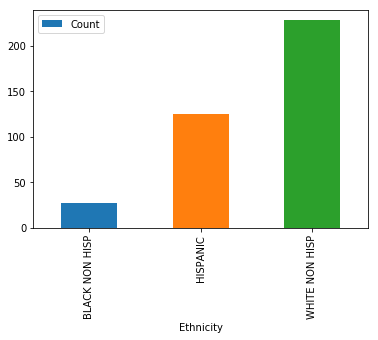

In [143]:
data_ema_2012_corr.plot.bar(x='Ethnicity',y='Count')

### Para mayor información sobre los atributos y métodos de la clase Dataframe en pandas ver:
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html